In [11]:
# For running inference on the TF-Hub module.
import tensorflow as tf
import os
import pandas as pd


In [14]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'training_demo','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'training_demo','pre-trained-models'),
    'TRAIN' : os.path.join('Tensorflow', 'workspace','images','train'),
    'TEST' : os.path.join('Tensorflow', 'workspace','images','test'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'training_demo','models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'), 
}

files = {
    'TF_RECORD_SCRIPT' : os.path.join(paths['SCRIPTS_PATH'],'preprocessing','generate_tfrecord.py'),
    'LABEL_MAP' : os.path.join(paths['ANNOTATION_PATH'],'label_map.pbtxt'),
    'PIPELINE' : os.path.join('Tensorflow','training_demo','models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8','pipeline.config')
}

In [76]:
paths['PRETRAINED_MODEL_PATH']

'Tensorflow\\training_demo\\pre-trained-models'

### Install the Object Detection API

In [19]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  87% (3170/3609)
Updating files:  88% (3176/3609)
Updating files:  89% (3213/3609)
Updating files:  90% (3249/3609)
Updating files:  91% (3285/3609)
Updating files:  92% (3321/3609)
Updating files:  93% (3357/3609)
Updating files:  94% (3393/3609)
Updating files:  95% (3429/3609)
Updating files:  96% (3465/3609)
Updating files:  97% (3501/3609)
Updating files:  98% (3537/3609)
Updating files:  99% (3573/3609)
Updating files: 100% (3609/3609)
Updating files: 100% (3609/3609), done.


In [23]:
import wget

In [31]:
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e .

        1 file(s) moved.
        1 file(s) copied.

d:\machine_learning\projects\TFODCourse\.venv\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
d:\machine_learning\projects\TFODCourse\.venv\Lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-311: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-311: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-311: module MAY be using inspect.stack
d:\machine_learning\projects\TFODCourse\.venv\Lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:  is an invalid version and will not be supported in a future release
  


running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_gr

DEPRECATION: Loading egg at d:\machine_learning\projects\tfodcourse\.venv\lib\site-packages\apache_beam-2.51.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\machine_learning\projects\tfodcourse\.venv\lib\site-packages\avro_python3-1.10.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\machine_learning\projects\tfodcourse\.venv\lib\site-packages\contextlib2-21.6.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\machine_learning

Obtaining file:///D:/machine_learning/projects/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


In [ ]:
#check installation
!python Tensorflow/models/research/object_detection/builders/model_builder_tf2_test.py

### Create Label Map

In [2]:
labels = [{'name':'LiveLong', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThumbsUp', 'id':3}]

with open("Tensorflow/training_demo/annotations/label_map.pbtxt", 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')
# you can also create it manually

### Create TF records

In [3]:
%env PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

env: PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [49]:
!python {files['TF_RECORD_SCRIPT']} -x {paths['TRAIN']} -l {files['LABEL_MAP']} -o {os.path.join(paths['ANNOTATION_PATH'],'train.record')}
!python {files['TF_RECORD_SCRIPT']} -x {paths['TEST']} -l {files['LABEL_MAP']} -o {os.path.join(paths['ANNOTATION_PATH'],'test.record')}

Successfully created the TFRecord file: Tensorflow\training_demo\annotations\train.record
Successfully created the TFRecord file: Tensorflow\training_demo\annotations\test.record


### Download Model

In [59]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


### Train Model

In [56]:
!copy {os.path.join('Tensorflow','training_demo','pre-trained-models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8','pipeline.config')} {os.path.join('Tensorflow','training_demo','models','my_ssd_resnet50_v1_fpn','pipeline.config')}

        1 file(s) copied.


In [60]:
!copy {os.path.join('TensorFlow','models','research','object_detection','model_main_tf2.py')} {os.path.join('Tensorflow','training_demo')}

        1 file(s) copied.


In [80]:
!python {os.path.join('Tensorflow','training_demo','model_main_tf2.py')} --model_dir={os.path.join('Tensorflow','training_demo','models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8')} --pipeline_config_path={os.path.join('Tensorflow','training_demo','models','ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8','pipeline.config')}

^C


### Evaluate Model on Image

In [9]:
import os
import tensorflow as tf
from Tensorflow.models.research.object_detection.utils import label_map_util
from Tensorflow.models.research.object_detection.utils import visualization_utils as viz_utils
from Tensorflow.models.research.object_detection.builders import model_builder
from Tensorflow.models.research.object_detection.utils import config_util
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-13')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


In [17]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABEL_MAP'])

In [31]:
tested_image = "livelong.49289352-703a-11ee-9c4b-e0d045d9590d.jpg"
IMAGE_PATH = os.path.join(paths['TEST'], tested_image)

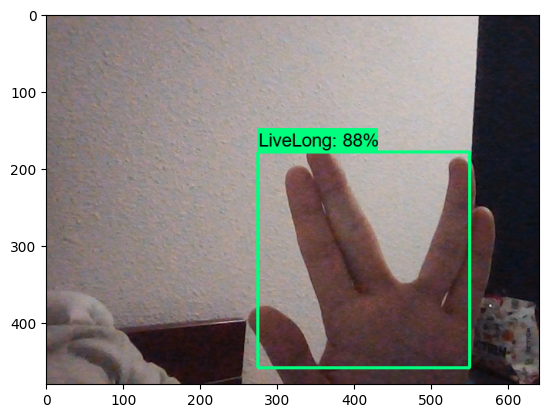

In [32]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()